# Life Expectancy (WHO)
Described on [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who) as "Statistical Analysis on factors influencing Life Expectancy" and tagged with "Health", "Social Science", "Data Cleaning", "Global".

Thus it's clearely not intended to be a data science project, but a data analysis project. The data is not clean, and the analysis is not deep.  I'll give it a shot though.


### The data-set aims to answer the following key questions:

* Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
* Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
* How does Infant and Adult mortality rates affect life expectancy?
* Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
* What is the impact of schooling on the lifespan of humans?
* Does Life Expectancy have positive or negative relationship with drinking alcohol?
* Do densely populated countries tend to have lower life expectancy?
* What is the impact of Immunization coverage on life Expectancy?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#display full info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

status and country are clearly categorical, and the rest are numerical.

In [4]:
df.Country = df.Country.astype('category')
df.Status = df.Status.astype('category')

In [13]:
df.drop_duplicates().dropna().count()[1]/df.count()[1] * 100

56.12661674608578

Well, 56% is majority, we may need imputation of some kind.

In [37]:
#let's use the reduced clean data for now
reduced = df.drop_duplicates().dropna()

In [38]:
df.Country.unique().shape #193 countries, we can't use 1-hot encoding, we'll use may use binary encoding
#193 is less than 256, so we can use binary encoding with only 8 bits, each bit in a column

(193,)

In [39]:
def clean(reduced):
    global df
    #binary encoding for countries
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(df['Country'])
    reduced['Country'] = le.transform(reduced['Country'])

    #change from decimal to binary
    reduced['Country'] = reduced['Country'].apply(lambda x: bin(x)[2:])

    #splitting the binary into 8 columns
    for i in range(8):
        reduced['Country'+str(i)] = reduced['Country'].apply(lambda x: x[i] if len(x) > i else '0')

    #drop the original column
    reduced.drop('Country', axis=1, inplace=True)

    #replace development status with 0 and 1
    reduced['Status'] = reduced['Status'].apply(lambda x: 1 if x == 'Developed' else 0)

    return reduced

In [40]:
reduced = clean(reduced)
reduced.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Income composition of resources,Schooling,Country0,Country1,Country2,Country3,Country4,Country5,Country6,Country7
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.479,10.1,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.476,10.0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.470,9.9,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.463,9.8,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.454,9.5,0,0,0,0,0,0,0,0


In [41]:
reduced.tail()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Income composition of resources,Schooling,Country0,Country1,Country2,Country3,Country4,Country5,Country6,Country7
2933,2004,0,44.3,723.0,27,4.36,0.0,68.0,31,27.1,...,0.407,9.2,1,1,0,0,0,0,0,0
2934,2003,0,44.5,715.0,26,4.06,0.0,7.0,998,26.7,...,0.418,9.5,1,1,0,0,0,0,0,0
2935,2002,0,44.8,73.0,25,4.43,0.0,73.0,304,26.3,...,0.427,10.0,1,1,0,0,0,0,0,0
2936,2001,0,45.3,686.0,25,1.72,0.0,76.0,529,25.9,...,0.427,9.8,1,1,0,0,0,0,0,0
2937,2000,0,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,...,0.434,9.8,1,1,0,0,0,0,0,0


In [68]:
#let's look at a dicision tree for the data
from sklearn.tree import DecisionTreeRegressor, export_graphviz

tree = DecisionTreeRegressor(max_depth= 4).fit(reduced.drop(['Life expectancy '], axis=1), reduced['Life expectancy '])
export_graphviz(tree, out_file='tree.dot', feature_names=reduced.drop(['Life expectancy '], axis=1).columns, filled=True)

#let's look at the data
reduced.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


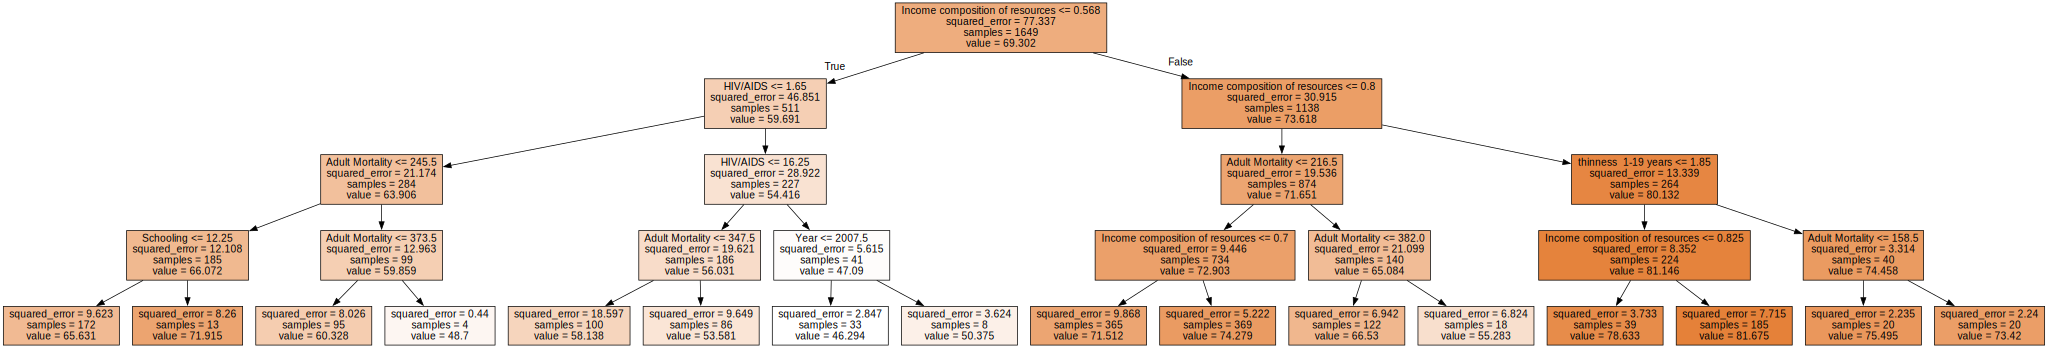

In [61]:
#read the tree
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png', engine='dot', encoding='utf-8')

In [69]:
tree.score(reduced.drop(['Life expectancy '], axis=1), reduced['Life expectancy '])

0.8941414912478549

This may be a good representation of the data, from which we can see the importance of the variables.

In [71]:
pd.DataFrame(tree.feature_importances_, index=reduced.drop(['Life expectancy '], axis=1).columns, columns=['Importance']).sort_values('Importance', ascending=False).head(10)

,Importance
Income composition of resources,0.742746
HIV/AIDS,0.123194
Adult Mortality,0.115621
thinness 1-19 years,0.013313
Schooling,0.004186
Year,0.000940
Population,0.000000
Country6,0.000000
Country5,0.000000
Country4,0.000000


In [73]:
#a more accurate model is pps matrix
import ppscore as pps
Mat = pps.matrix(reduced)

#let's look at the matrix
Mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Year,Year,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Year,Status,0.000006,classification,True,weighted F1,0.785677,0.785678,DecisionTreeClassifier()
2,Year,Life expectancy,0.000000,regression,True,mean absolute error,6.868648,7.130785,DecisionTreeRegressor()
3,Year,Adult Mortality,0.000000,regression,True,mean absolute error,92.218921,94.895239,DecisionTreeRegressor()
4,Year,infant deaths,0.000000,regression,True,mean absolute error,31.696180,44.221355,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
836,Country7,Country3,0.000000,classification,True,weighted F1,0.522135,0.470534,DecisionTreeClassifier()
837,Country7,Country4,0.000000,classification,True,weighted F1,0.518496,0.420438,DecisionTreeClassifier()
838,Country7,Country5,0.000000,classification,True,weighted F1,0.519709,0.457113,DecisionTreeClassifier()
839,Country7,Country6,0.128374,classification,True,weighted F1,0.562159,0.618366,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='y'>

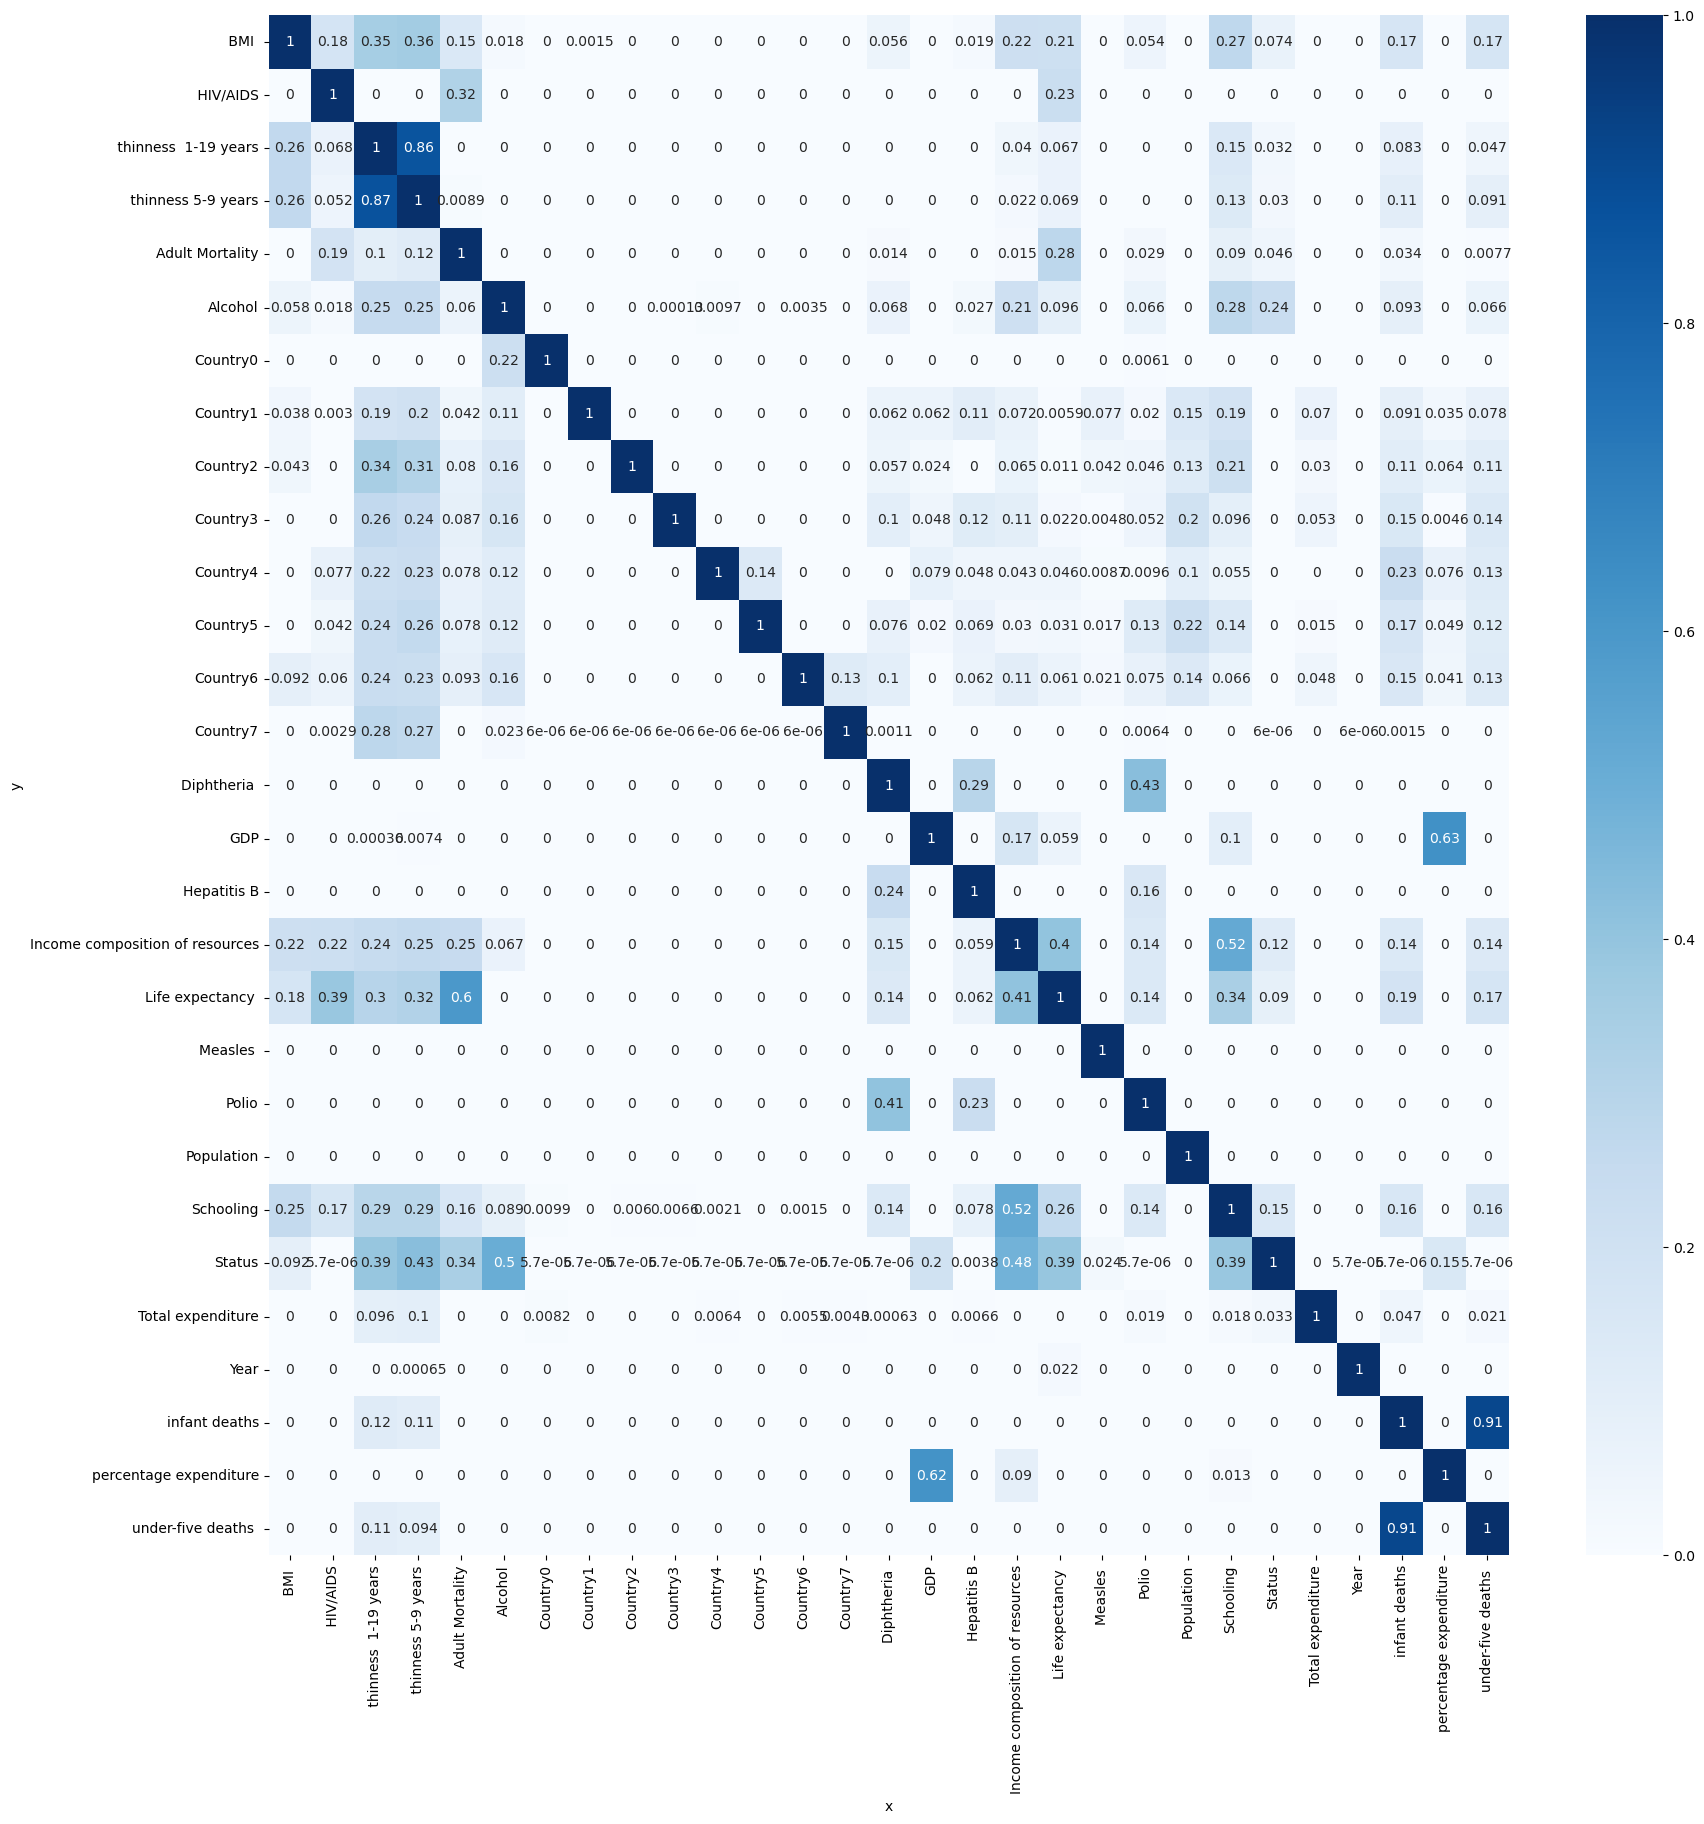

In [74]:
#let's heat map the matrix
plt.figure(figsize=(20,20))
pps = Mat[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(pps, annot=True, cmap='Blues')

In [88]:
imp = Mat[(Mat['y'] == 'Life expectancy ') & (Mat['ppscore'] > 0)].sort_values('ppscore', ascending=False).x
Mat.loc[imp.index.values]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
60,Life expectancy,Life expectancy,1.000000,predict_itself,True,None,0.000000,1.000000,None
89,Adult Mortality,Life expectancy,0.596290,regression,True,mean absolute error,6.868648,2.772943,DecisionTreeRegressor()
553,Income composition of resources,Life expectancy,0.407427,regression,True,mean absolute error,6.868648,4.070172,DecisionTreeRegressor()
408,HIV/AIDS,Life expectancy,0.386869,regression,True,mean absolute error,6.868648,4.211378,DecisionTreeRegressor()
582,Schooling,Life expectancy,0.337281,regression,True,mean absolute error,6.868648,4.551985,DecisionTreeRegressor()
524,thinness 5-9 years,Life expectancy,0.315101,regression,True,mean absolute error,6.868648,4.704331,DecisionTreeRegressor()
495,thinness 1-19 years,Life expectancy,0.300762,regression,True,mean absolute error,6.868648,4.802816,DecisionTreeRegressor()
118,infant deaths,Life expectancy,0.185565,regression,True,mean absolute error,6.868648,5.594067,DecisionTreeRegressor()
263,BMI,Life expectancy,0.175002,regression,True,mean absolute error,6.868648,5.666619,DecisionTreeRegressor()
292,under-five deaths,Life expectancy,0.174435,regression,True,mean absolute error,6.868648,5.670516,DecisionTreeRegressor()


In [92]:
imp.values

array(['Life expectancy ', 'Adult Mortality',
       'Income composition of resources', ' HIV/AIDS', 'Schooling',
       ' thinness 5-9 years', ' thinness  1-19 years', 'infant deaths',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', 'Status',
       'Hepatitis B'], dtype=object)

That means that 'Life expectancy ', 'Adult Mortality',
       'Income composition of resources', ' HIV/AIDS', 'Schooling',
       ' thinness 5-9 years', ' thinness  1-19 years', 'infant deaths',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria ', 'Status',
       and 'Hepatitis B' are the most important variables (only 14). Let's look at the correlation matrix.

<AxesSubplot:>

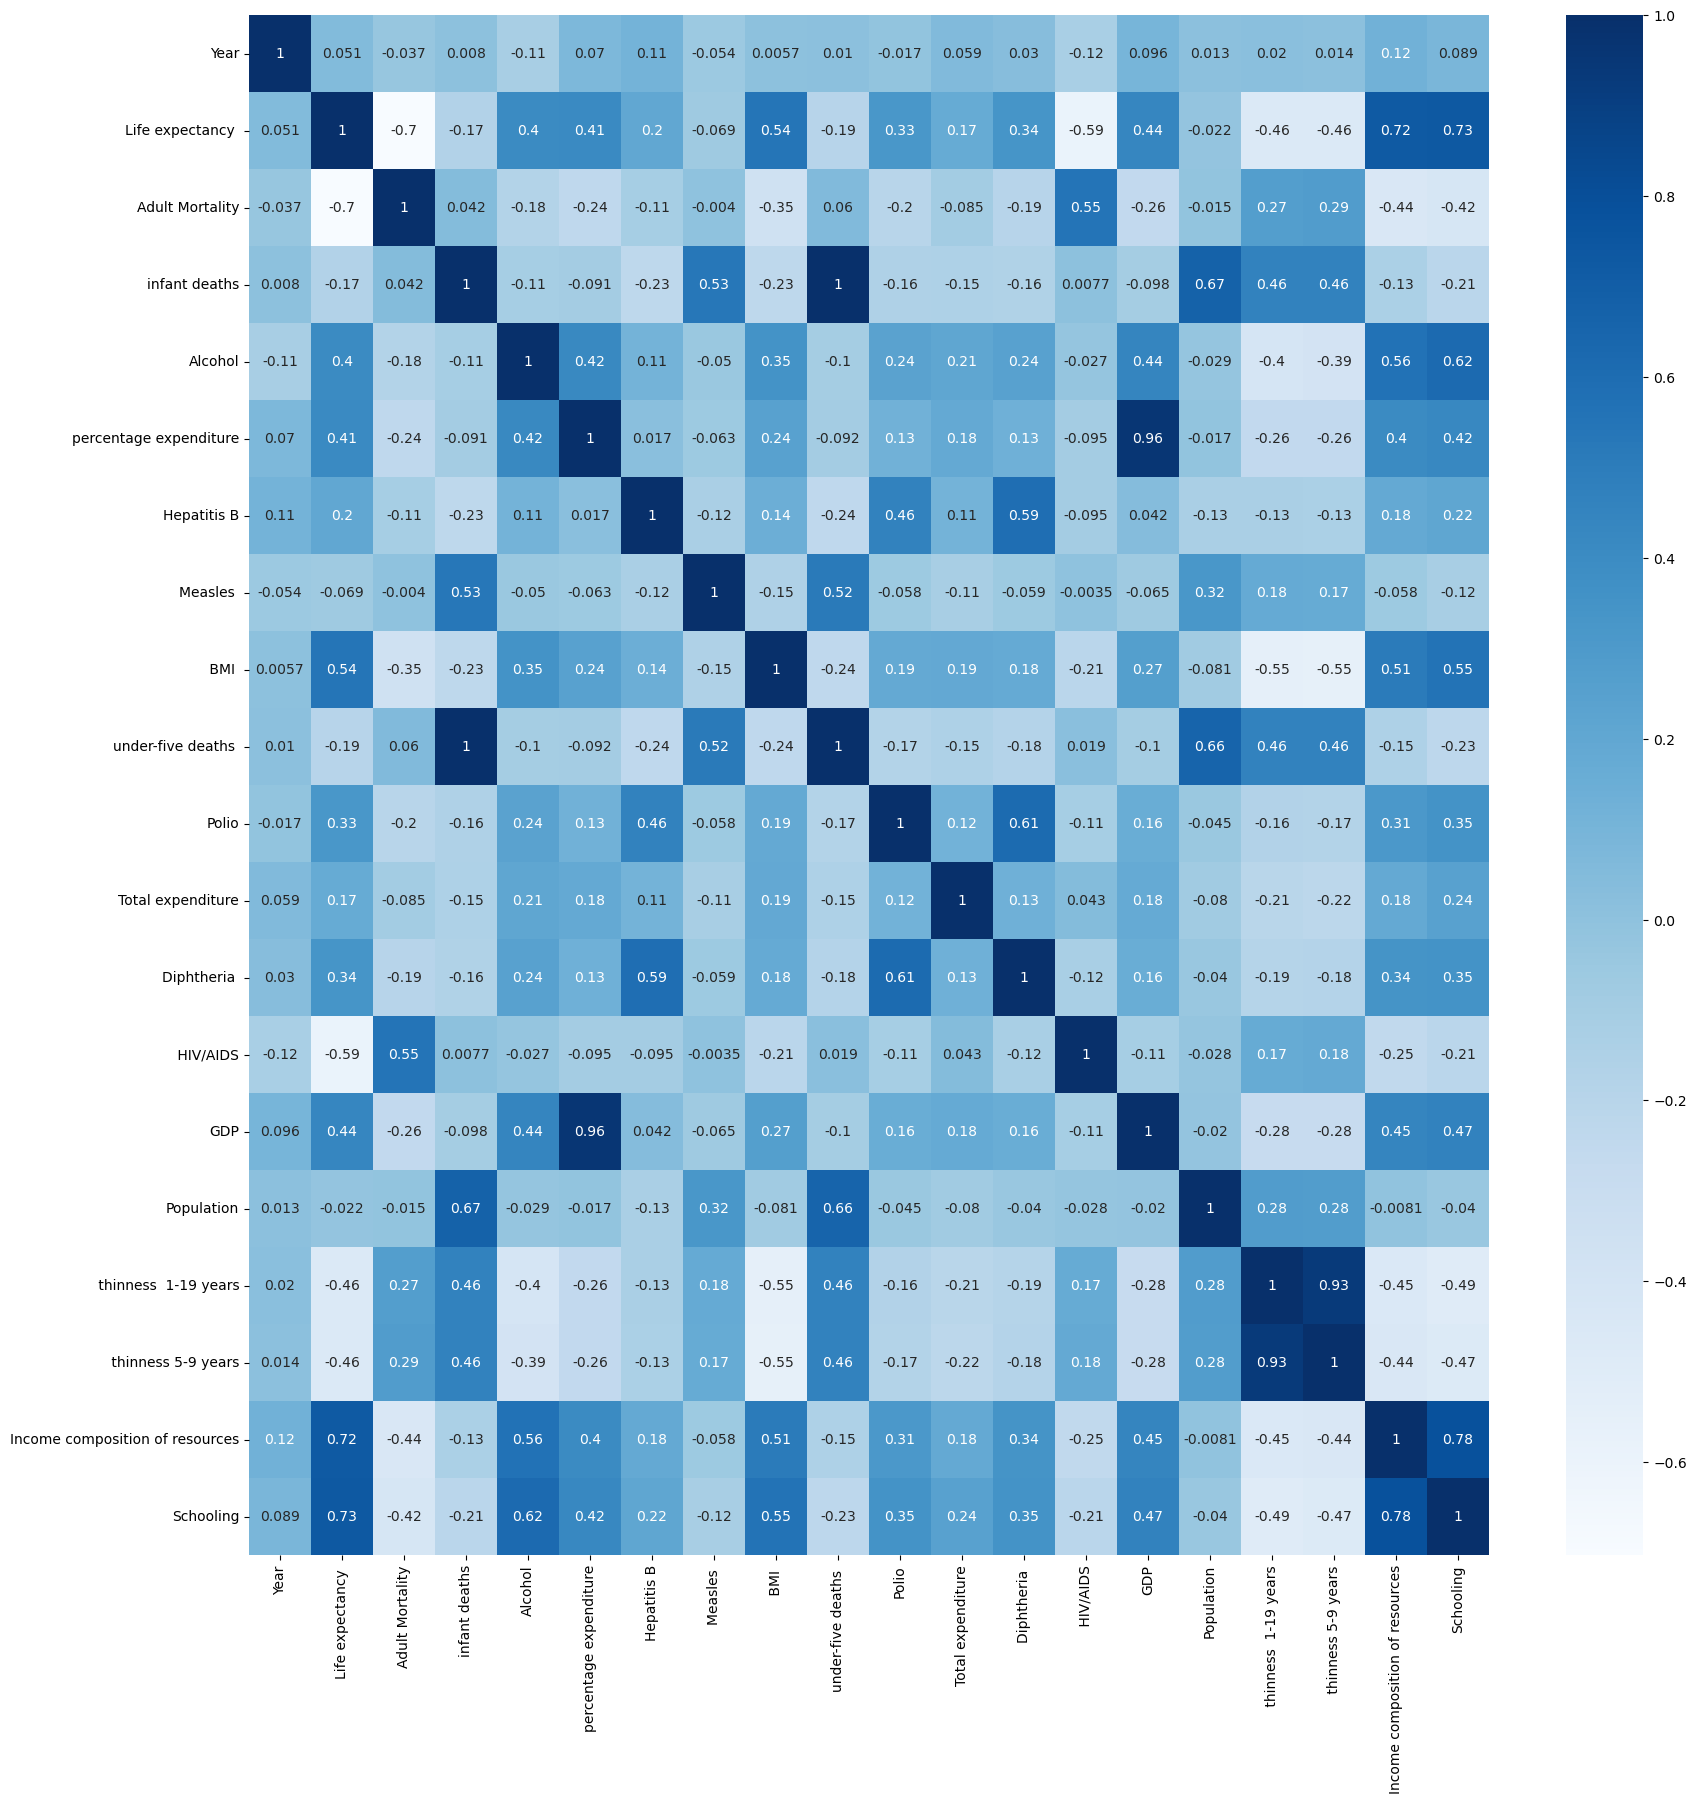

In [93]:
#correlation matrix
corr = reduced.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='Blues')

In [135]:
imp = imp.values.tolist()
imp.remove('Status')

In [143]:
corr = corr['Life expectancy '].loc[imp].sort_values(ascending=False)

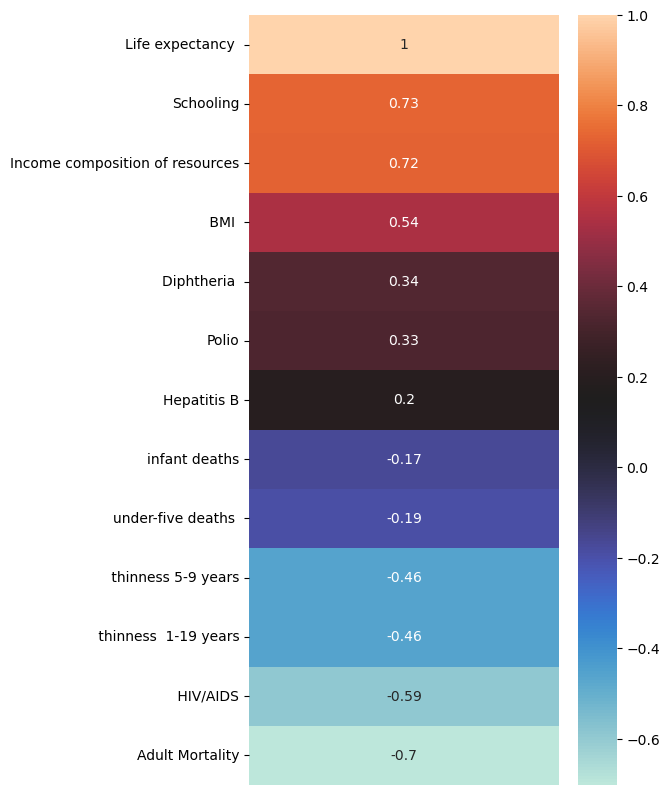

In [145]:
#correlation calculates the linear relationship between numerical variables only
plt.figure(figsize=(5,10))
sns.heatmap(corr.values.reshape(-1, 1), annot=True, cmap='icefire')
#set the yticks
plt.yticks(np.arange(0.5, len(corr), 1), corr.index, rotation=0)
plt.xticks([]);

In [151]:
#let's use linear regression as a baseline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X = reduced[imp] #life expectancy is the target, hence is removed from imp
y = reduced['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cv = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print('Cross Validation Score: ', cv.mean())

Cross Validation Score:  0.821750964124013


0.82 is good, but not great. Let's look at the scatter plot.

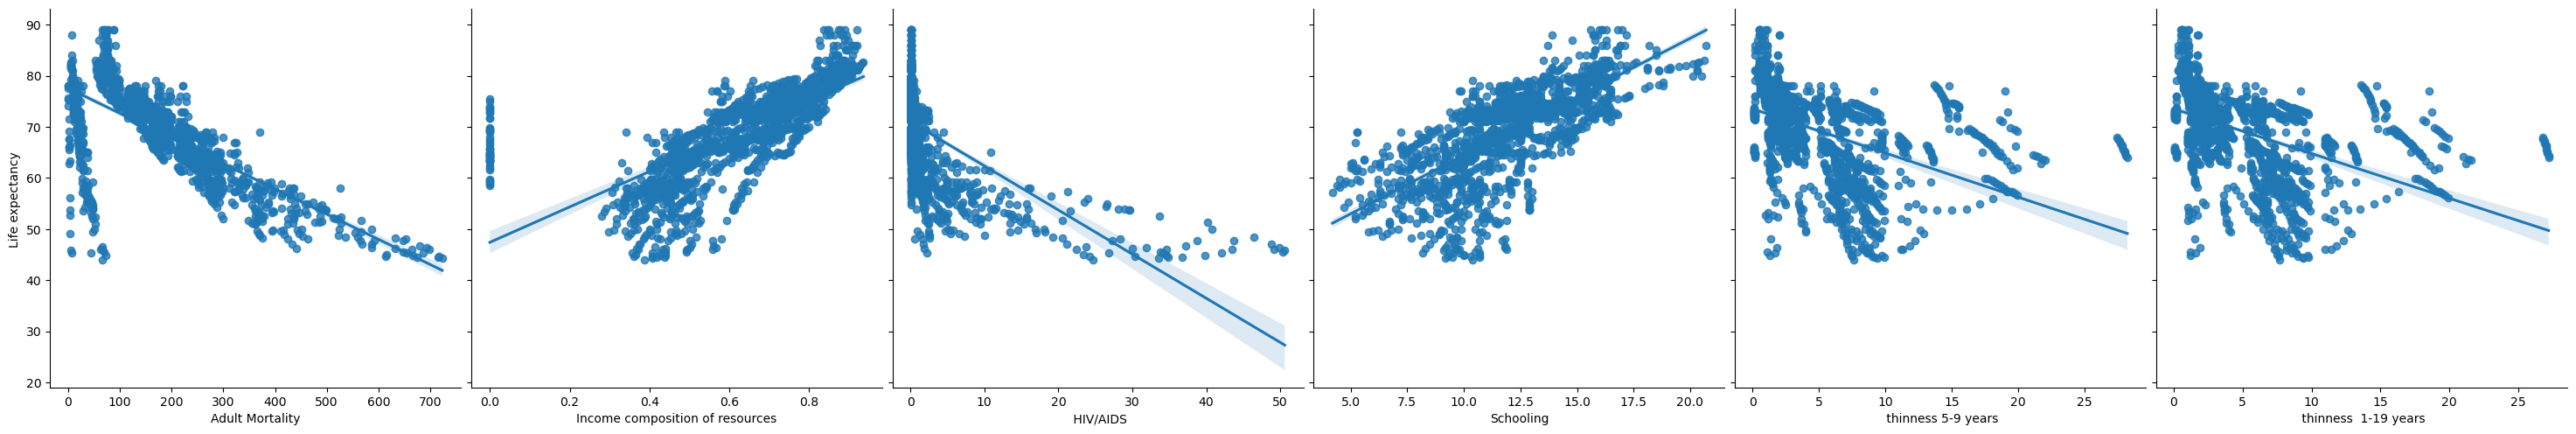

In [167]:
#scatter each feature with the target in a grid
sns.pairplot(reduced, x_vars=imp[:6], y_vars='Life expectancy ', height=5, aspect=1, kind='reg');

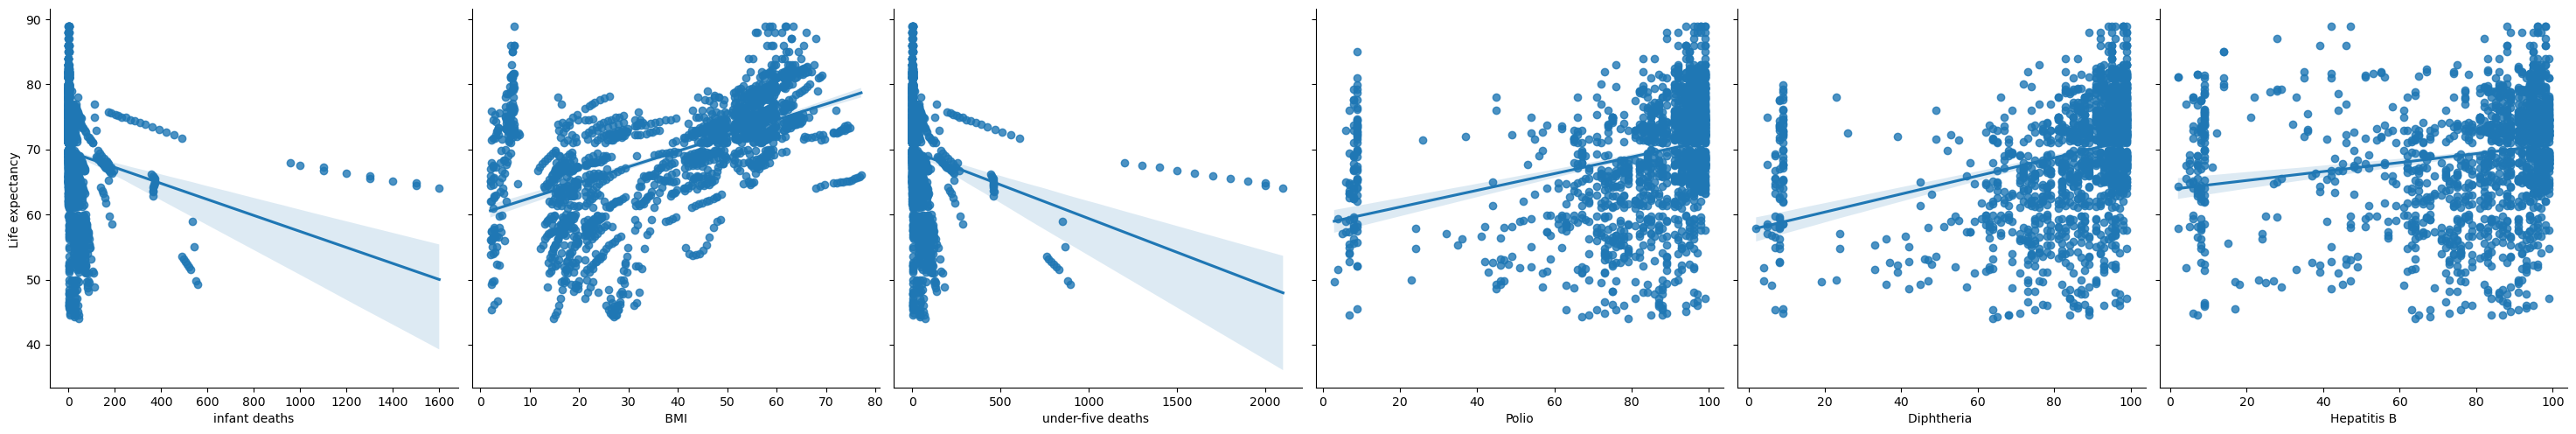

In [169]:
sns.pairplot(reduced, x_vars=imp[-6:], y_vars='Life expectancy ', height=5, aspect=1, kind='reg');

That explains the score, though 82% on only clean data with only important features is not bad.

In [189]:
#set all dataset to numerical
reduced = reduced.apply(pd.to_numeric)

In [190]:
#let's look at the score with all the features
X_train, X_test, y_train, y_test = train_test_split(reduced.drop(['Life expectancy '], axis=1), reduced['Life expectancy '], test_size=0.2, random_state=42)

In [191]:
lng = LinearRegression().fit(X_train, y_train)
lng.score(X_test, y_test)

0.822243745829464

not much, but it counts.

In [200]:
#let's try tree based models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#let's try random forest
rf = RandomForestRegressor(n_estimators=100, max_depth=4).fit(X_train, y_train)
print(rf.score(X_test, y_test))

#let's try gradient boosting
gb = GradientBoostingRegressor(n_estimators=100, max_depth=4).fit(X_train, y_train)
print(gb.score(X_test, y_test))

#let's try adaboost
ada = AdaBoostRegressor(n_estimators=100, learning_rate=0.1).fit(X_train, y_train)
print(ada.score(X_test, y_test))

#let's try bagging
bag = BaggingRegressor(n_estimators=100, max_samples=0.5, max_features=0.5).fit(X_train, y_train)
print(bag.score(X_test, y_test))

#let's try decision tree
tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
print(tree.score(X_test, y_test))


0.905313437190626
0.9423069740586423
0.882542719301229
0.9435670110088754
0.8689436281952215


Let's go abit further with bagging.

In [201]:
#grid search for bagging
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 300, 500, 700, 1000],
                'max_samples': [0.5, 0.7, 0.9, 1],
                'max_features': [0.5, 0.7, 0.9, 1]}
grid = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True, n_jobs= -1)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_test, y_test))

{'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 1000}
0.958323513088543
0.9538693536540456


In [205]:
bg = BaggingRegressor(n_estimators=5000, max_samples=0.9, max_features=0.7, n_jobs= -1).fit(X_train, y_train)
#cross validation score
cv = cross_val_score(bg, X_train, y_train, cv=5)

In [207]:
cv.mean() #approximation of test score

0.9577581598491272

In [ ]:
!pip install miceforest

In [214]:
#let's impute the missing values in the original dataset using machine learning models
import miceforest as mf
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#miceforest
mf_imputer = mf.ImputationKernel(data=df, save_all_iterations=True, random_state=42)
mf_imputer.mice(5, verbose=True)
imputed = mf_imputer.complete_data(0)

Initialized logger with name mice 1-5
Dataset 0
1  | Life expectancy  | Adult Mortality | Polio | Diphtheria  |  thinness 5-9 years |  thinness  1-19 years |  BMI  | Schooling | Income composition of resources | Alcohol | Total expenditure | GDP | Hepatitis B | Population
2  | Life expectancy  | Adult Mortality | Polio | Diphtheria  |  thinness 5-9 years |  thinness  1-19 years |  BMI  | Schooling | Income composition of resources | Alcohol | Total expenditure | GDP | Hepatitis B | Population
3  | Life expectancy  | Adult Mortality | Polio | Diphtheria  |  thinness 5-9 years |  thinness  1-19 years |  BMI  | Schooling | Income composition of resources | Alcohol | Total expenditure | GDP | Hepatitis B | Population
4  | Life expectancy  | Adult Mortality | Polio | Diphtheria  |  thinness 5-9 years |  thinness  1-19 years |  BMI  | Schooling | Income composition of resources | Alcohol | Total expenditure | GDP | Hepatitis B | Population
5  | Life expectancy  | Adult Mortality | Polio | Di

In [215]:
imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2938 non-null   category
 1   Year                             2938 non-null   int64   
 2   Status                           2938 non-null   category
 3   Life expectancy                  2938 non-null   float64 
 4   Adult Mortality                  2938 non-null   float64 
 5   infant deaths                    2938 non-null   int64   
 6   Alcohol                          2938 non-null   float64 
 7   percentage expenditure           2938 non-null   float64 
 8   Hepatitis B                      2938 non-null   float64 
 9   Measles                          2938 non-null   int64   
 10   BMI                             2938 non-null   float64 
 11  under-five deaths                2938 non-null   int64   
 12  Polio 

In [216]:
imputed = clean(imputed).apply(pd.to_numeric)
imputed.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Income composition of resources,Schooling,Country0,Country1,Country2,Country3,Country4,Country5,Country6,Country7
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.479,10.1,0,0,0,0,0,0,0,0
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.476,10.0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.470,9.9,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.463,9.8,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.454,9.5,0,0,0,0,0,0,0,0


In [219]:
X_train, X_test, y_train, y_test = train_test_split(imputed.drop(['Life expectancy '], axis=1), imputed['Life expectancy '], test_size=0.2, random_state=42)

In [220]:
bg = BaggingRegressor(n_estimators=5000, max_samples=0.9, max_features=0.7, n_jobs= -1).fit(X_train, y_train)
#cross validation score
cv = cross_val_score(bg, X_train, y_train, cv=5)

fitting a regressor aims to find the most important issues that need to be addressed in order to improve the life expectancy. The regressor is only a decision metric. The regressor is trained on the data, and the most important features are extracted from it.

In [222]:
cv.mean()

0.9595864222885

In [224]:
bg = BaggingRegressor(n_estimators=5000, max_samples=0.9, max_features=0.7, n_jobs= -1).fit(X_train, y_train)
bg.score(X_test, y_test)

0.9716270073354148

It's now safe to fit the regressor on the whole data and inspect the most important features.

In [226]:
bg = BaggingRegressor(n_estimators=5000, max_samples=0.9, max_features=0.7, n_jobs= -1).fit(imputed.drop(['Life expectancy '], axis=1), imputed['Life expectancy '])
bg.score(imputed.drop(['Life expectancy '], axis=1), imputed['Life expectancy '])

0.9947704899019071

<center><img src = "https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/thematedkid/phpPlfUuy.gif" width = "400" /> </center>

Let's check the importances

In [229]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bg.estimators_
], axis=0)

In [236]:
list = imputed.columns[np.argsort(feature_importances)[::-1]].tolist()

Given these results, we can conclude that the most important features are: 'under-five deaths ',
 'Adult Mortality',
 'Alcohol',
 ' HIV/AIDS',
 'Year',
 'infant deaths',
 'percentage expenditure',
 'Population',
 'Measles ',
 ' BMI ',
 'GDP',
 'Polio',
 'Life expectancy ',
 'Status',
 'Diphtheria ',
 ' thinness 5-9 years',
 'Hepatitis B',
 ' thinness  1-19 years',
 and 'Total expenditure'.

 Meaning that me need to focus on these features in order to improve the life expectancy.

 Now we know what we need to focus on, and we have a model that can predict the life expectancy. We can now use this model to predict the life expectancy of a country, and use the results to improve the life expectancy. Let's look at our beloved Egypt as an example.

In [259]:
imp #aproximately the same, thus we should adress these in order

['Adult Mortality',
 'Income composition of resources',
 ' HIV/AIDS',
 'Schooling',
 ' thinness 5-9 years',
 ' thinness  1-19 years',
 'infant deaths',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Diphtheria ',
 'Hepatitis B']

In [253]:
#we need new and accurate data for Egypt, starting from 2016

Egypt = df[df.Country == 'Egypt'].mean().to_frame().T

In [254]:
Egypt #new data should look like this

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2007.5,71.5,170.625,56.25,0.188667,0.0,96.6875,1069.25,49.2625,67.625,96.6875,5.346,96.6875,0.1,NaN,NaN,3.125,3.075,0.647625,11.89375


Year is 2020, Egypt had Adult Mortality of 25.16 per 100 (or 231.6 per 1000 in this manner), infant deaths	18.24 per thousand, percentage expenditure 12.26%, ... and so on. Let's predict the life expectancy.

Statistics are hard to find actually, but theoretically it should work and be around seventy years given the data from 2000 - 2015.